<a href="https://colab.research.google.com/github/anjalikankoriya/LGMVIP--DATA-SCIENCE/blob/main/TASK-04/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK4: Stock Market Prediction AND Forecasting Using Stacked LSTM**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
db = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(db)
train_set = dataset_train.iloc[:, 1:2].values
dataset_train.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_scale = scaler.fit_transform(train_set)

In [5]:
a_train = []
b_train = []
for i in range(60, 2035):
    a_train.append(train_set_scale[i-60:i, 0])
    b_train.append(train_set_scale[i, 0])
a_train, b_train = np.array(a_train), np.array(b_train)

a_train = np.reshape(a_train, (a_train.shape[0], a_train.shape[1], 1))

In [6]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(a_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(a_train,b_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 15s 121ms/step - loss: 0.0083
Epoch 2/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0022
Epoch 6/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0019
Epoch 8/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0017
Epoch 13/100

In [7]:
db = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(db)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 43ms/step


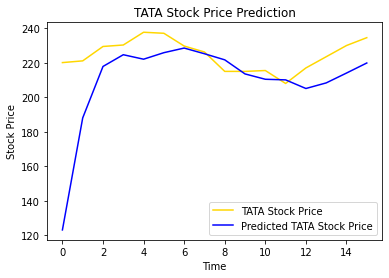

In [13]:
plt.plot(real_stock_price, color = 'gold', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()